In [216]:
!pip3 install tensorflow stable-baselines3 gym-anytrading gym shimmy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [217]:
!pip3 install numpy pandas matplotlib

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [218]:
# Standard Python Libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Stable baselines for RL
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Import OpenAI Gym
import gym
import gym_anytrading

In [219]:
nasdaq_df = pd.read_csv("data/nasdaq_historical_data_past_year_2023.csv")

In [220]:
nasdaq_df.head()

,Date,Open,High,Low,Close
0,07/07/2023,"15,070.50","15,210.63","15,032.56","15,036.85"
1,07/06/2023,"15,054.10","15,106.45","14,969.14","15,089.45"
2,07/05/2023,"15,165.36","15,275.18","15,162.66","15,203.78"
3,07/03/2023,"15,190.54","15,232.96","15,153.60","15,208.69"
4,06/30/2023,"15,085.24","15,213.75","15,081.57","15,179.21"


In [221]:
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df["Date"])
nasdaq_df.set_index("Date", inplace=True)

cols = ["Open", "High", "Low", "Close"]
for c in cols:
    nasdaq_df[c] = nasdaq_df[c].str.replace(",", "")

nasdaq_df = nasdaq_df.astype({"Open": float, "High": float, "Low": float, "Close": float})

nasdaq_df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [222]:
nasdaq_df.head()

,Open,High,Low,Close
Date,,,,
2023-07-07,15070.50,15210.63,15032.56,15036.85
2023-07-06,15054.10,15106.45,14969.14,15089.45
2023-07-05,15165.36,15275.18,15162.66,15203.78
2023-07-03,15190.54,15232.96,15153.60,15208.69
2023-06-30,15085.24,15213.75,15081.57,15179.21


In [223]:
env = gym.make('stocks-v0', df=nasdaq_df, frame_bound=(5,100), window_size=4)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (4, 2)
  logger.warn(


In [224]:
env.signal_features

array([[ 1.508945e+04,  0.000000e+00],
       [ 1.520378e+04,  1.143300e+02],
       [ 1.520869e+04,  4.910000e+00],
       [ 1.517921e+04, -2.948000e+01],
       [ 1.493995e+04, -2.392600e+02],
       [ 1.496457e+04,  2.462000e+01],
       [ 1.494591e+04, -1.866000e+01],
       [ 1.468902e+04, -2.568900e+02],
       [ 1.489148e+04,  2.024600e+02],
       [ 1.504232e+04,  1.508400e+02],
       [ 1.486745e+04, -1.748700e+02],
       [ 1.507015e+04,  2.027000e+02],
       [ 1.508392e+04,  1.377000e+01],
       [ 1.518548e+04,  1.015600e+02],
       [ 1.500569e+04, -1.797900e+02],
       [ 1.490085e+04, -1.048400e+02],
       [ 1.478430e+04, -1.165500e+02],
       [ 1.452836e+04, -2.559400e+02],
       [ 1.448454e+04, -4.382000e+01],
       [ 1.430329e+04, -1.812500e+02],
       [ 1.455809e+04,  2.548000e+02],
       [ 1.455650e+04, -1.590000e+00],
       [ 1.454664e+04, -9.860000e+00],
       [ 1.444151e+04, -1.051300e+02],
       [ 1.425409e+04, -1.874200e+02],
       [ 1.435499e+04,  1

info {'total_reward': -2349.5300000000043, 'total_profit': 0.582491464997229, 'position': 0}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/Library/Frameworks/Python.

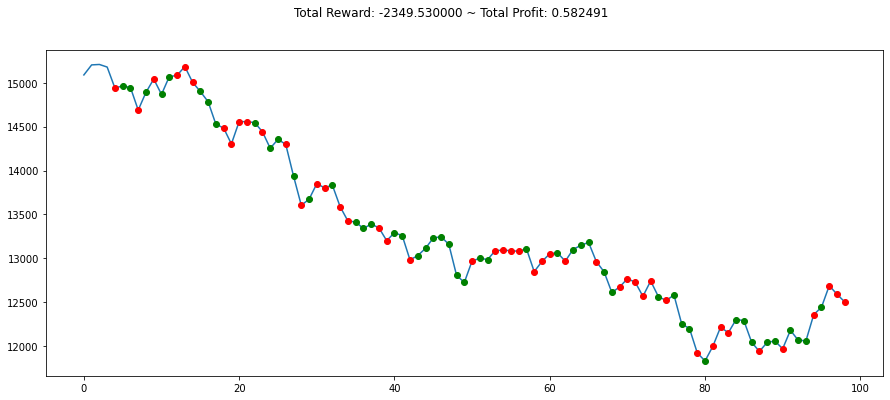

In [225]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [226]:
env_maker = lambda: gym.make('stocks-v0', df=nasdaq_df, frame_bound=(15,100), window_size=4)
env = DummyVecEnv([env_maker])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [227]:
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10_000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2548 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1631        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.018214611 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.678      |
|    explained_variance   | 5.25e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 5.5e+04     |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00897    |
|    value_loss           | 1.14e+05    |
-----------------------------------------
-----------------

In [228]:
env = gym.make('stocks-v0', df=nasdaq_df, frame_bound=(90, 110), window_size=4)
obs = env.reset()
while True: 
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(action)
    if done:
        print("info", info)
        break

[[12044.87  -245.94]
 [11938.57  -106.3 ]
 [12042.12   103.55]
 [12057.79    15.67]]
info {'total_reward': 0.0, 'total_profit': 1.0, 'position': 0}
